## Курс "Анализ временных рядов"

### Задание 5

**Импорт библиотек**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)


Загрузка данных

In [2]:
# Download hourly data from OPSD website
url = 'https://data.open-power-system-data.org/time_series/2020-10-06/'
datafile = url + 'time_series_60min_singleindex.csv'
df_all = pd.read_csv(datafile, index_col='utc_timestamp', parse_dates=True, low_memory=False)
df_all.head()

,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,734.81,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,766.64,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,733.13,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


В качестве примера рассмотрим Данию. В качестве периода анализа возьмём период с 2015 по 2019 годы.

In [3]:
def extract_country(df_all, country_code, year_min=None, year_max=None):
    """Extract data for a single country"""
    
    # List of columns to extract
    columns = [col for col in df_all.columns if col.startswith(country_code)]
    
    # Extract columns and remove country codes from column labels
    columns_map = {col : col[3:] for col in columns}
    df_out = df_all[columns].rename(columns=columns_map)
    
    # Exclude years outside of specified range, if any
    if year_min is not None:
        df_out = df_out[df_out.index.year >= year_min]
    if year_max is not None:
        df_out = df_out[df_out.index.year <= year_max]
        
    return df_out
df_hrly = extract_country(df_all, country_code='DK', year_min=2015, year_max=2019)
df_hrly

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,wind_offshore_capacity,wind_offshore_generation_actual,wind_onshore_capacity,wind_onshore_generation_actual,...,1_wind_generation_actual,1_wind_offshore_generation_actual,1_wind_onshore_generation_actual,2_load_actual_entsoe_transparency,2_load_forecast_entsoe_transparency,2_price_day_ahead,2_solar_generation_actual,2_wind_generation_actual,2_wind_offshore_generation_actual,2_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,NaN,NaN,489.0,NaN,4643.0,NaN,1264.0,NaN,3379.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00+00:00,3100.02,3126.8,489.0,NaN,4643.0,2357.33,1264.0,902.71,3379.0,1454.62,...,1774.05,567.07,1206.98,1305.06,1341.9,16.04,NaN,583.28,335.64,247.64
2015-01-01 02:00:00+00:00,2980.39,3019.0,489.0,NaN,4643.0,2387.35,1264.0,830.87,3379.0,1556.48,...,1902.23,549.83,1352.40,1235.63,1284.5,14.60,NaN,485.12,281.04,204.08
2015-01-01 03:00:00+00:00,2933.49,2976.3,489.0,NaN,4643.0,2594.47,1264.0,915.43,3379.0,1679.04,...,2123.97,660.47,1463.50,1190.32,1242.3,14.95,NaN,470.50,254.96,215.54
2015-01-01 04:00:00+00:00,2941.54,2982.5,489.0,0.01,4643.0,3092.01,1264.0,1056.28,3379.0,2035.73,...,2525.12,743.59,1781.53,1190.07,1229.4,14.50,NaN,566.89,312.69,254.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,3785.27,3776.0,NaN,0.00,NaN,1495.56,NaN,521.71,NaN,973.85,...,1231.68,456.83,774.85,1600.52,1589.0,33.54,0.0,263.88,64.88,199.00
2019-12-31 20:00:00+00:00,3582.21,3585.0,NaN,0.00,NaN,1158.63,NaN,400.75,NaN,757.88,...,915.95,327.71,588.24,1528.20,1520.0,33.17,0.0,242.68,73.04,169.64
2019-12-31 21:00:00+00:00,3438.26,3430.0,NaN,0.00,NaN,1188.65,NaN,407.82,NaN,780.83,...,974.21,348.83,625.38,1467.49,1464.0,33.04,0.0,214.44,58.99,155.45


In [4]:
data = pd.DataFrame()
data['Consumption'] = df_hrly['load_actual_entsoe_transparency']
data = data.iloc[1: , :]
data

,Consumption
utc_timestamp,
2015-01-01 01:00:00+00:00,3100.02
2015-01-01 02:00:00+00:00,2980.39
2015-01-01 03:00:00+00:00,2933.49
2015-01-01 04:00:00+00:00,2941.54
2015-01-01 05:00:00+00:00,2999.89
...,...
2019-12-31 19:00:00+00:00,3785.27
2019-12-31 20:00:00+00:00,3582.21
2019-12-31 21:00:00+00:00,3438.26


In [5]:
y = data['Consumption'].values.reshape(-1, 1)

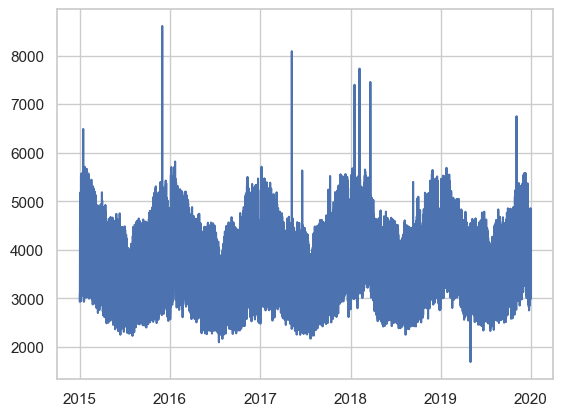

In [6]:
plt.plot(data.index, y)

Данные во временных рядах можно рассматривать как в чистом виде, так и преобразовать.

Попробуем скользящее средние и скользящие СКО

<Axes: xlabel='utc_timestamp'>

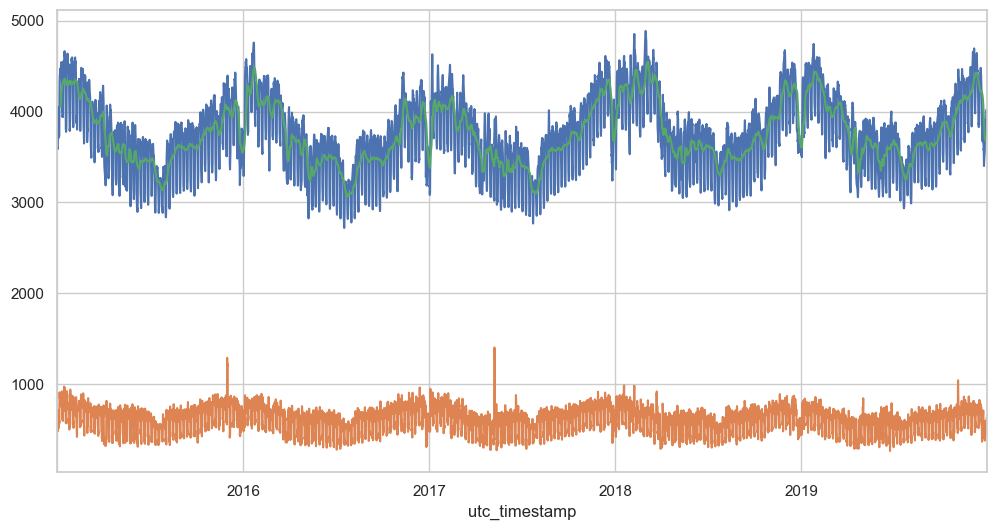

In [7]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
# create moving-averages
data['Consumption'].rolling(24).mean().plot()
data['Consumption'].rolling(24).std().plot()
data['Consumption'].rolling(24*7).mean().plot()

Дифференцирование

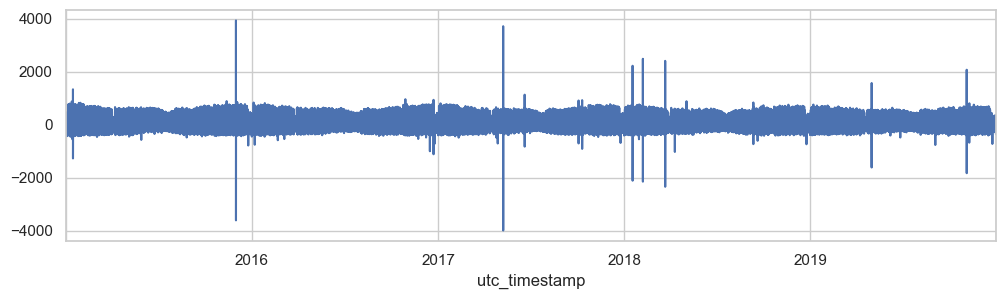

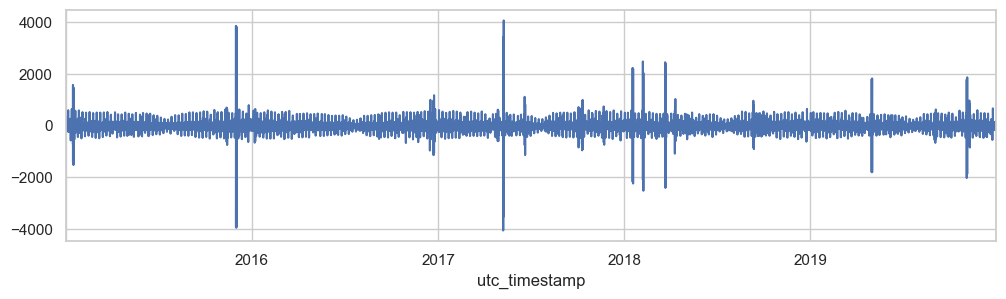

In [8]:
plt.rc('figure',figsize=(12,3))
plt.rc('font',size=15)

data['Consumption'].diff(1).plot(); plt.show()
data['Consumption'].diff(24).diff(1).plot(); plt.show()

Более тонкие разложения, например по т.н. внутренним модам

In [9]:
!pip install dsatools

In [10]:
import dsatools

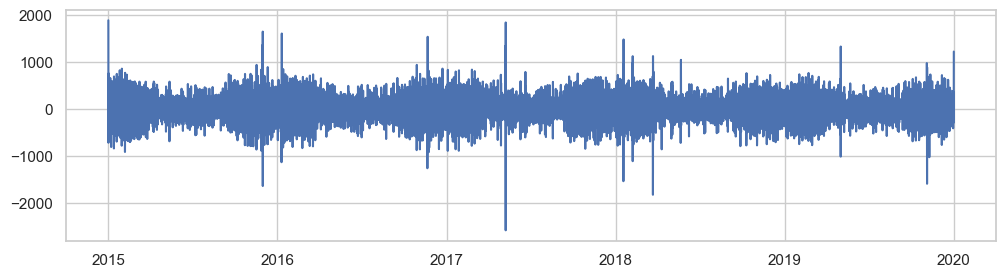

In [11]:
y_dec = dsatools.decomposition.emd(y.reshape(-1)[:], order =10)
plt.plot(data.index[1:-1],y_dec[0,1:-1]); plt.show()


Ряд может быть обработан на основе четких правил

In [12]:
!pip install adtk

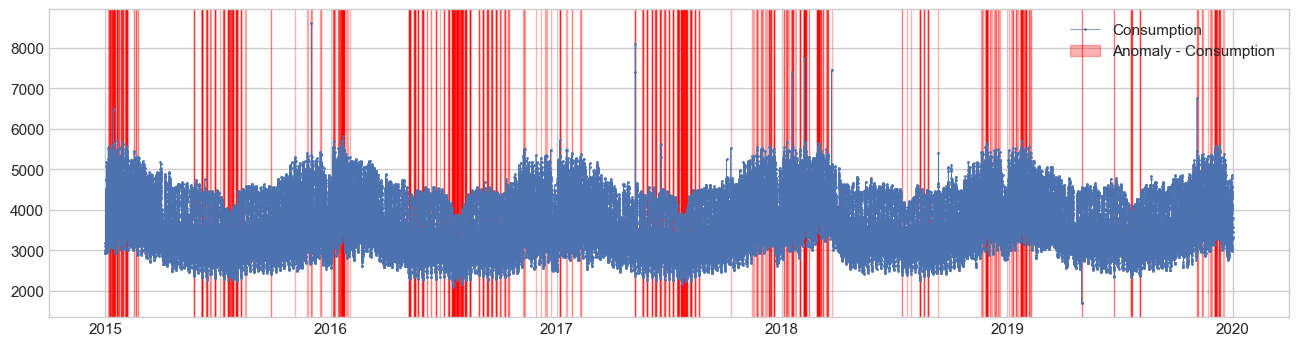

In [13]:
from adtk.detector import QuantileAD
from adtk.visualization import plot
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color='red');

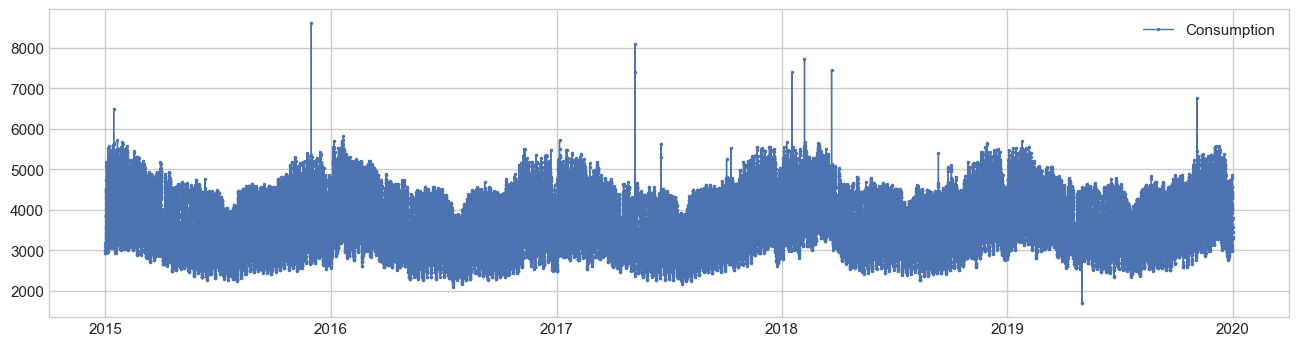

In [14]:
from adtk.detector import ThresholdAD
threshold_val = ThresholdAD(high=27000, low=1000)
anomalies_thresh = threshold_val.detect(data['Consumption'])
anomalies_thresh.value_counts()
plot(data, anomaly=anomalies_thresh, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='black');

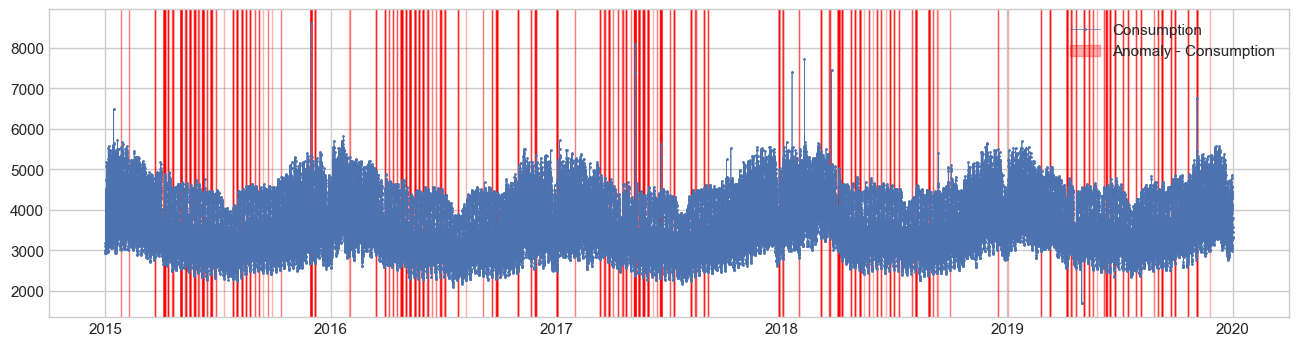

In [15]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=2.0, side='positive', window=30)
anomalies = volatility_shift_ad.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color='red');

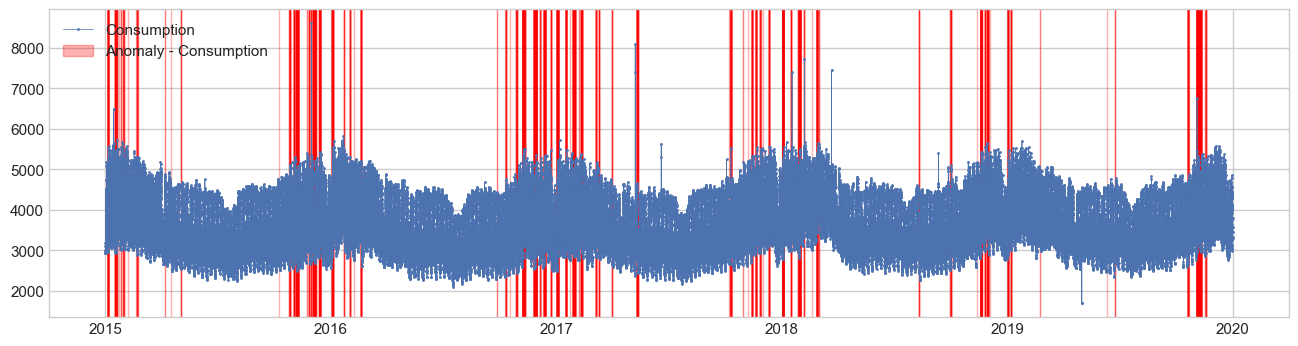

In [16]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=0.5, side='both', window=50)
anomalies = level_shift_ad.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color='red');

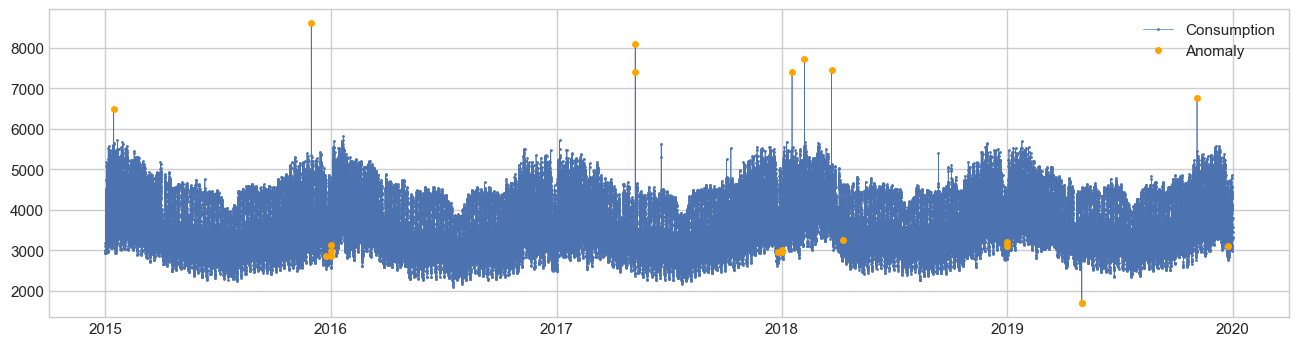

In [17]:
from adtk.detector import SeasonalAD
seasonal_vol = SeasonalAD()
anomalies = seasonal_vol.fit_detect(data['Consumption'])
anomalies.value_counts()

plot(data, anomaly=anomalies, anomaly_color="orange", anomaly_tag="marker");

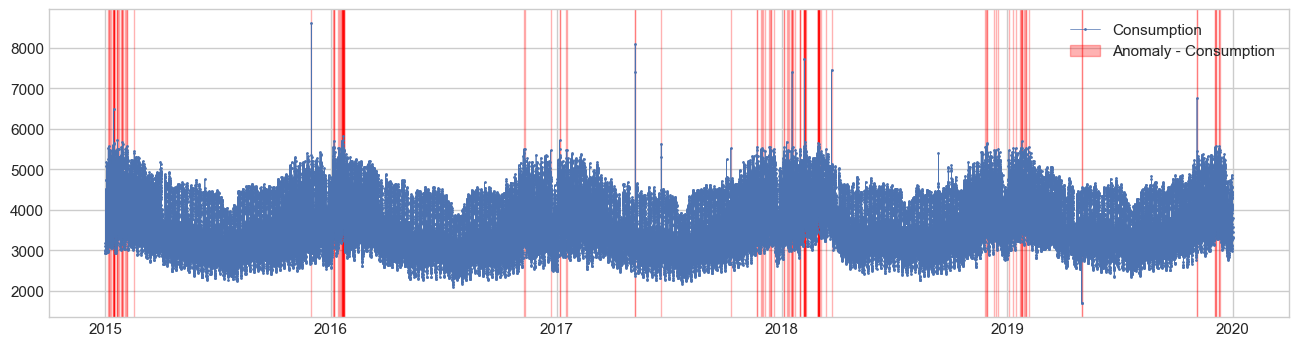

In [18]:
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=0.9)
anomalies = iqr_ad.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color='red');

Также могут быть использованы специализированные алгоритмы

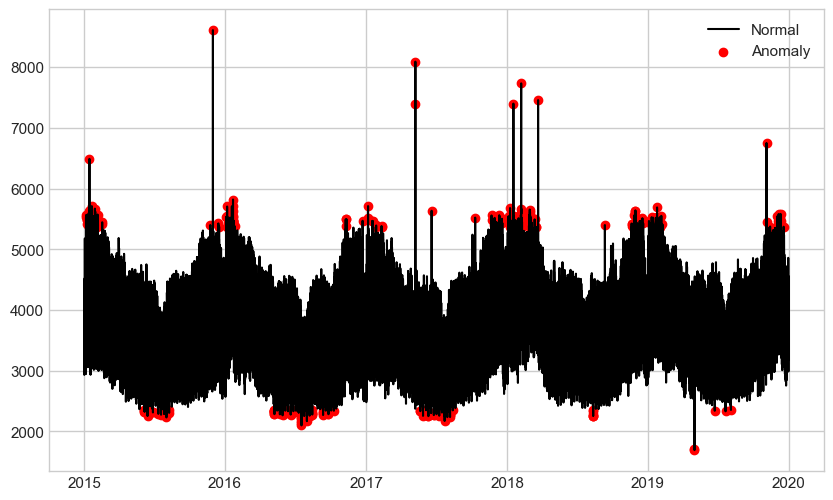

In [19]:
from sklearn.ensemble import IsolationForest

outliers_fraction = 0.01

model =  IsolationForest(contamination=outliers_fraction)
model.fit(data['Consumption'].values.reshape(-1, 1))

data['anomaly_IF'] = model.predict(y)

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = data.loc[data['anomaly_IF'] == -1, ['Consumption']] #anomaly

ax.plot(data.index, data['Consumption'], color='black', label = 'Normal')
ax.scatter(a.index,a['Consumption'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

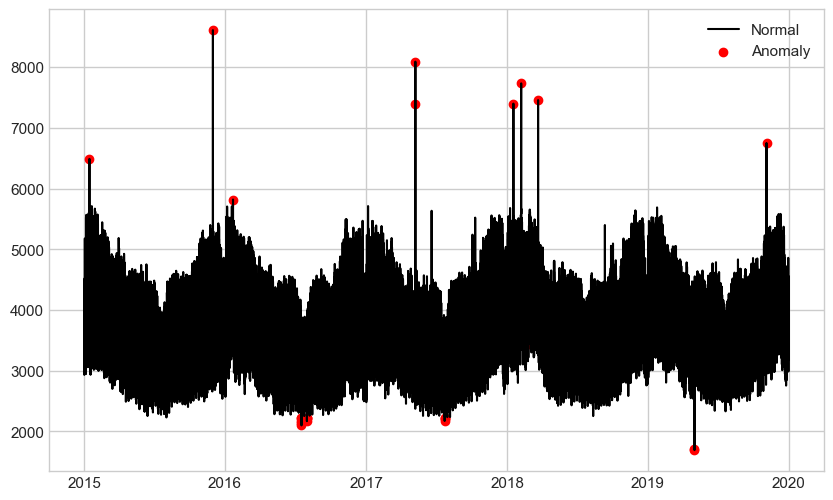

In [20]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(novelty=True)

lof.fit(y)

data['anomaly_LOF'] = lof.predict()


fig, ax = plt.subplots(figsize=(10,6))

a = data.loc[data['anomaly_LOF'] == -1, ['Consumption']] #anomaly

ax.plot(data.index, data['Consumption'], color='black', label = 'Normal')
ax.scatter(a.index,a['Consumption'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

[   11 43812] [-1  0]


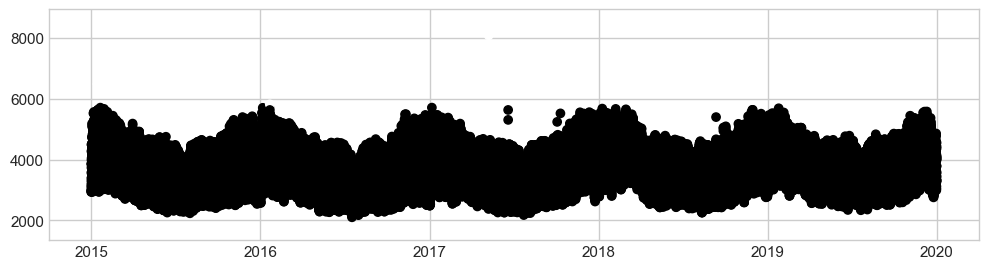

In [21]:
from sklearn.cluster import DBSCAN, KMeans
model=DBSCAN(eps = 100.)
# model = KMeans(n_clusters=10)

model.fit(y)
colors = model.labels_
cls,counts = np.unique(colors, return_counts=True)
sort_idx = np.argsort(counts)#[::-1]
print(counts[sort_idx], cls[sort_idx])
plt.scatter(data.index, y, c = colors == cls[sort_idx][-1])

По мимо sklearn есть и другие библиотеки работы с аномалиями, например https://pyod.readthedocs.io/en/latest/

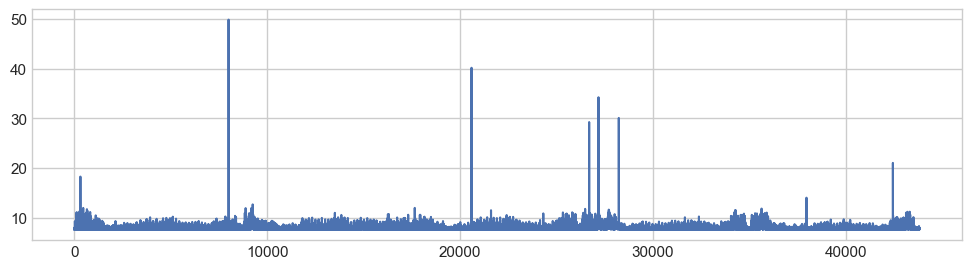

In [22]:
import pyod.models
from pyod.models.gmm import GMM

clf = GMM( n_components=2, )
clf.fit(y)
y_scores = clf.decision_scores_
plt.plot(y_scores)

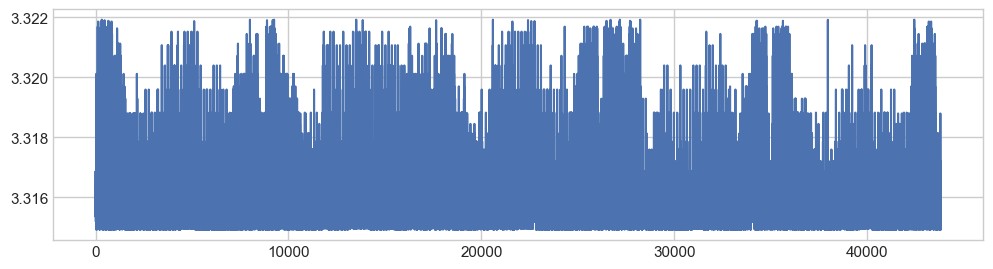

In [23]:
from pyod.models.hbos import HBOS

clf = HBOS(n_bins=100, alpha=0.1, tol=0.5, contamination=0.1)
clf.fit(y)
y_scores = clf.decision_scores_
plt.plot(y_scores)

в данной библиотеки pyod можно в т.ч. реализовать попробовать на основе восстановления автоэнокдером

In [24]:
import numpy as np
import pandas as pd
from pyod.models.auto_encoder import AutoEncoder

clf = AutoEncoder(hidden_neurons =[1,125, 125, 1])
clf.fit(y)
y_scores = clf.decision_scores_

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 125)               2

1233/1233 [==============================] - 4s 4ms/step - loss: 1.0027 - val_loss: 0.9761
Epoch 60/100
1233/1233 [==============================] - 5s 4ms/step - loss: 1.0027 - val_loss: 0.9761
Epoch 61/100
1233/1233 [==============================] - 4s 4ms/step - loss: 1.0027 - val_loss: 0.9761
Epoch 62/100
1233/1233 [==============================] - 4s 3ms/step - loss: 1.0027 - val_loss: 0.9761
Epoch 63/100
1233/1233 [==============================] - 5s 4ms/step - loss: 1.0027 - val_loss: 0.9761
Epoch 64/100
1233/1233 [==============================] - 4s 4ms/step - loss: 1.0027 - val_loss: 0.9761
Epoch 65/100
1233/1233 [==============================] - 4s 3ms/step - loss: 1.0027 - val_loss: 0.9761
Epoch 66/100
1233/1233 [==============================] - 4s 4ms/step - loss: 1.0027 - val_loss: 0.9761
Epoch 67/100
1233/1233 [==============================] - 5s 4ms/step - loss: 1.0027 - val_loss: 0.9761
Epoch 68/100
1233/1233 [==============================] - 4s 4ms/step - loss:

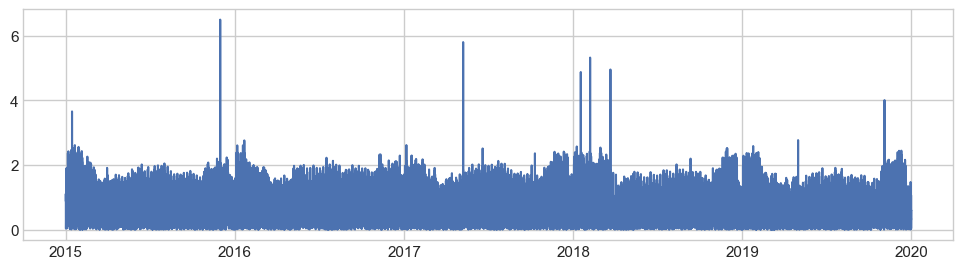

In [25]:
plt.plot(data.index,y_scores); plt.show()
